In [1]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
sys.path.append('../')
from core.models import MNISTDense
from core.initializers import He, Xavier
from core.optimizers import GradDesc, Momentum, Adagrad, RMSProp, Adam
from core.losses import Crossentropy
from core.activations import ReLu, Softmax
from core.metrics import Precision, Recall, Roc_Auc

## Считывание данных из бинарных файлов

In [3]:
project_path =  Path.cwd().parent
data_path = project_path / "data"
preproc_path = data_path / "preprocessed"

source_train_im_path = preproc_path / "train-images-idx3-ubyte.bin"
source_train_l_path = preproc_path / "train-labels-idx1-ubyte.bin"
source_test_im_path = preproc_path / "t10k-images-idx3-ubyte.bin"
source_test_l_path = preproc_path / "t10k-labels-idx1-ubyte.bin"


### Обучающая выборка

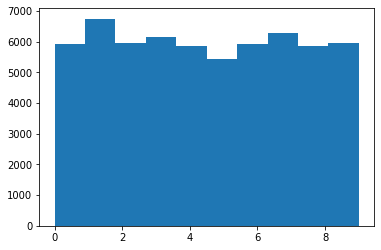

In [4]:
# Метки обуающей выборки
train_labels = np.fromfile(source_train_l_path, dtype=np.uint8, offset=8)
plt.hist(train_labels);

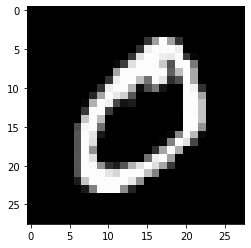

In [5]:
# Изображения обучающей выборки
train_size, rows, columns = 60000, 28, 28
train_images = np.fromfile(source_train_im_path, dtype=np.uint8, offset=16).reshape((train_size, rows, columns))
plt.imshow(train_images[1,:,:], cmap='gray')

### Тестовая выборка

In [6]:
# Метки тестовой выборки
# test_labels = np.fromfile(source_test_l_path, dtype=np.uint8, offset=8)
# plt.hist(test_labels);

In [7]:
# Изображения тестовой выборки
# test_size, rows, columns = 10000, 28, 28
# test_images = np.fromfile(source_test_im_path, dtype=np.uint8, offset=16).reshape((test_size, rows, columns))
# plt.imshow(test_images[1,:,:], cmap='gray')

## Создадим модель 

In [8]:
n_train = 40000
n_classes = 10
prepared_labels = train_labels[:n_train]
prepared_images = train_images[:n_train].reshape(n_train, -1)
prepared_images = (prepared_images > 0).astype(np.uint8)

### GradDesc

In [25]:
model_grad = MNISTDense(
    input_size=28*28,
    layers_sizes=[64, 32, 10],
    initializers_classes=[He, He, Xavier],
    activations_classes=[ReLu, ReLu, Softmax],
    optimizer=GradDesc(0.001),
    loss=Crossentropy,
    need_batch_normaliser=True
)
metrics = [Precision(), Recall()]
history_grad = model_grad.fit(1, 64, prepared_images, prepared_labels, metrics=metrics, l1=10**(-4), l2=10**(-4))

By epoch progress


Iter 1


500it [00:11, 41.83it/s]


Mean loss: 1.100000023841858
Fit scores: Precision 0.8114 | Recall 0.8098
Validation scores: Precision 0.8111 | Recall 0.8089


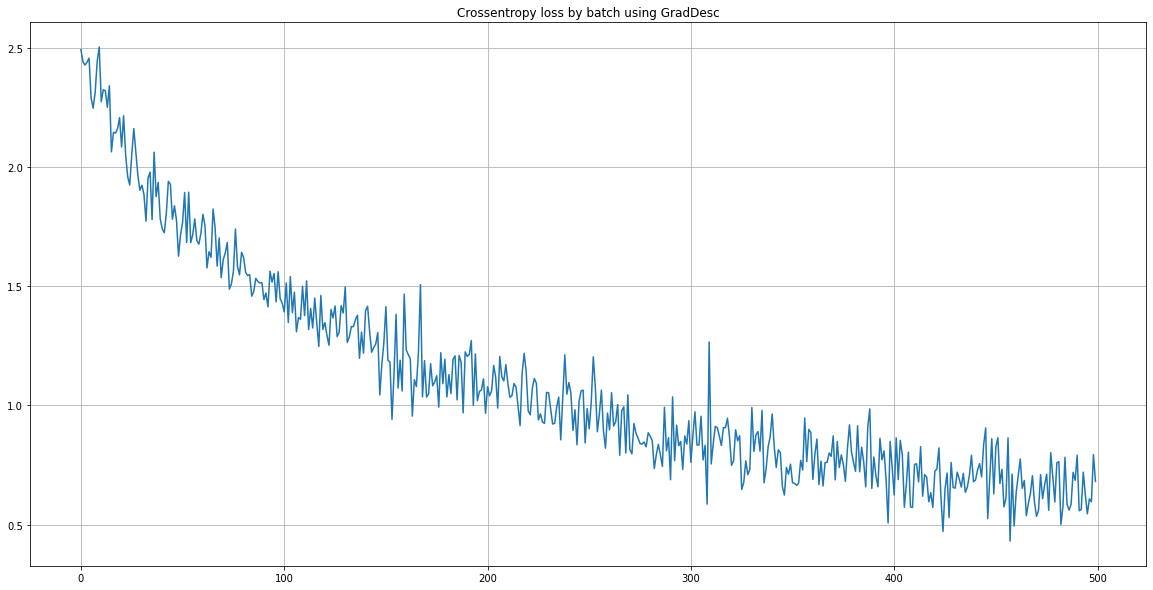

In [26]:
plt.figure(figsize=(20,10))
plt.title("Crossentropy loss by batch using GradDesc")
plt.grid()
plt.plot(history_grad.flatten())

### Momentum

In [27]:
model_momentum = MNISTDense(
    input_size=28*28,
    layers_sizes=[64, 32, 10],
    initializers_classes=[He, He, Xavier],
    activations_classes=[ReLu, ReLu, Softmax],
    optimizer=Momentum(learning_rate=0.0001, momentum=0.9),
    loss=Crossentropy,
    need_batch_normaliser=True
)
metrics = [Precision(), Recall()]
history_momentum = model_momentum.fit(1, 64, prepared_images, prepared_labels, metrics=metrics, l1=10**(-3), l2=10**(-4))

By epoch progress


Iter 1


500it [00:11, 43.52it/s]


Mean loss: 1.149999976158142
Fit scores: Precision 0.7961 | Recall 0.795
Validation scores: Precision 0.793 | Recall 0.7908


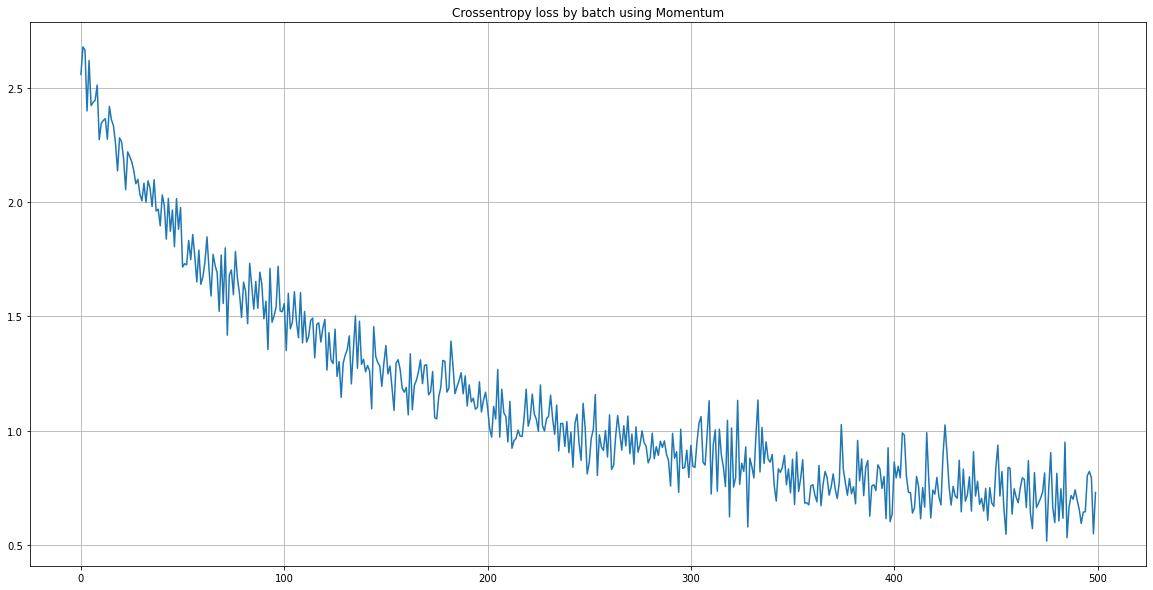

In [28]:
plt.figure(figsize=(20,10))
plt.title("Crossentropy loss by batch using Momentum")
plt.grid()
plt.plot(history_momentum.flatten())

### Adagrad

In [30]:
model_adagrad = MNISTDense(
    input_size=28*28,
    layers_sizes=[64, 32, 10],
    initializers_classes=[He, He, Xavier],
    activations_classes=[ReLu, ReLu, Softmax],
    optimizer=Adagrad(0.001),
    loss=Crossentropy,
    need_batch_normaliser=True
)
metrics = [Precision(), Recall()]
history_adagrad = model_adagrad.fit(2, 64, prepared_images, prepared_labels, metrics=metrics, l1=10**(-4), l2=10**(-4))

By epoch progress


Iter 1


500it [00:16, 30.13it/s]


Mean loss: 0.9800000190734863
Fit scores: Precision 0.84 | Recall 0.8364
Validation scores: Precision 0.841 | Recall 0.8378


Iter 2


500it [00:15, 32.00it/s]


Mean loss: 0.7099999785423279
Fit scores: Precision 0.8612 | Recall 0.8592
Validation scores: Precision 0.8598 | Recall 0.8582


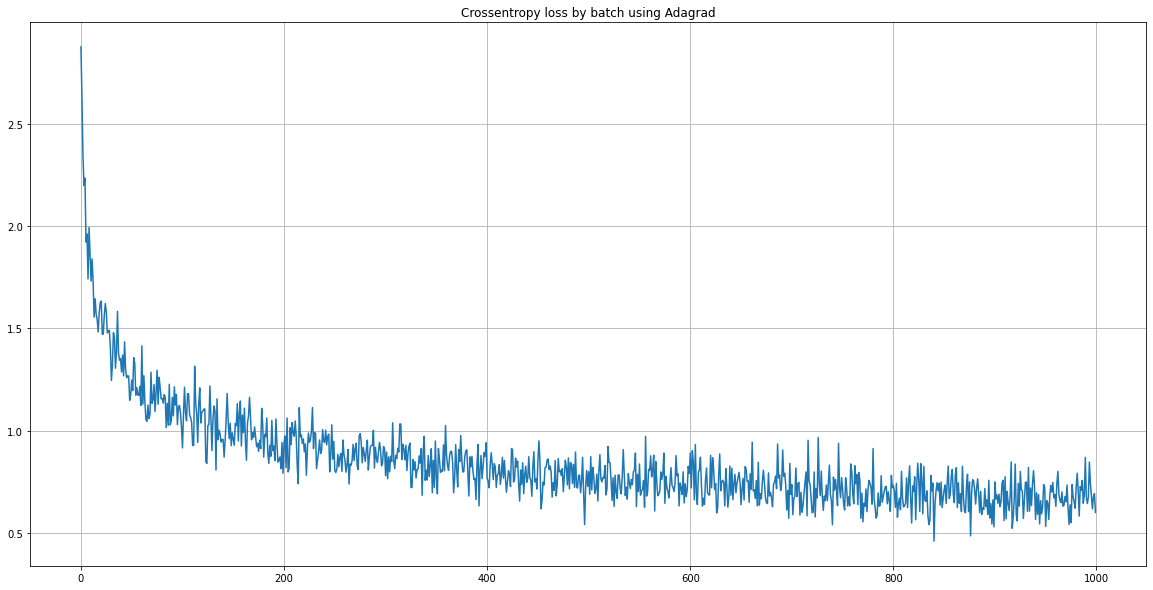

In [31]:
plt.figure(figsize=(20,10))
plt.title("Crossentropy loss by batch using Adagrad")
plt.grid()
plt.plot(history_adagrad.flatten())

### RMSProp

In [32]:
model_rmsprop = MNISTDense(
    input_size=28*28,
    layers_sizes=[64, 32, 10],
    initializers_classes=[He, He, Xavier],
    activations_classes=[ReLu, ReLu, Softmax],
    optimizer=RMSProp(0.01, momentum=0.9),
    loss=Crossentropy,
    need_batch_normaliser=True
)
metrics = [Precision(), Recall()]
history_rmsprop = model_rmsprop.fit(1, 64, prepared_images, prepared_labels, metrics=metrics, l1=10**(-2), l2=10**(-2))

By epoch progress


Iter 1


441it [00:14, 30.83it/s]

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Crossentropy loss by batch using RMSProp")
plt.grid()
plt.plot(history_rmsprop.flatten())

### Adam

In [23]:
model_adam = MNISTDense(
    input_size=28*28,
    layers_sizes=[64, 32, 10],
    initializers_classes=[He, He, Xavier],
    activations_classes=[ReLu, ReLu, Softmax],
    optimizer=Adam(10**(-3), momentum_1=0.9, momentum_2=0.9),
    loss=Crossentropy,
    need_batch_normaliser=True
)
metrics = [Precision(), Recall()]
history_adam = model_adam.fit(2, 64, prepared_images, prepared_labels, metrics=metrics, l1=10**(-3), l2=10**(-4))

By epoch progress


Iter 1


500it [00:16, 30.15it/s]


Mean loss: 0.5099999904632568
Fit scores: Precision 0.9037 | Recall 0.9014
Validation scores: Precision 0.8919 | Recall 0.8897


Iter 2


500it [00:17, 29.19it/s]


Mean loss: 0.3499999940395355
Fit scores: Precision 0.9084 | Recall 0.9054
Validation scores: Precision 0.9041 | Recall 0.9011


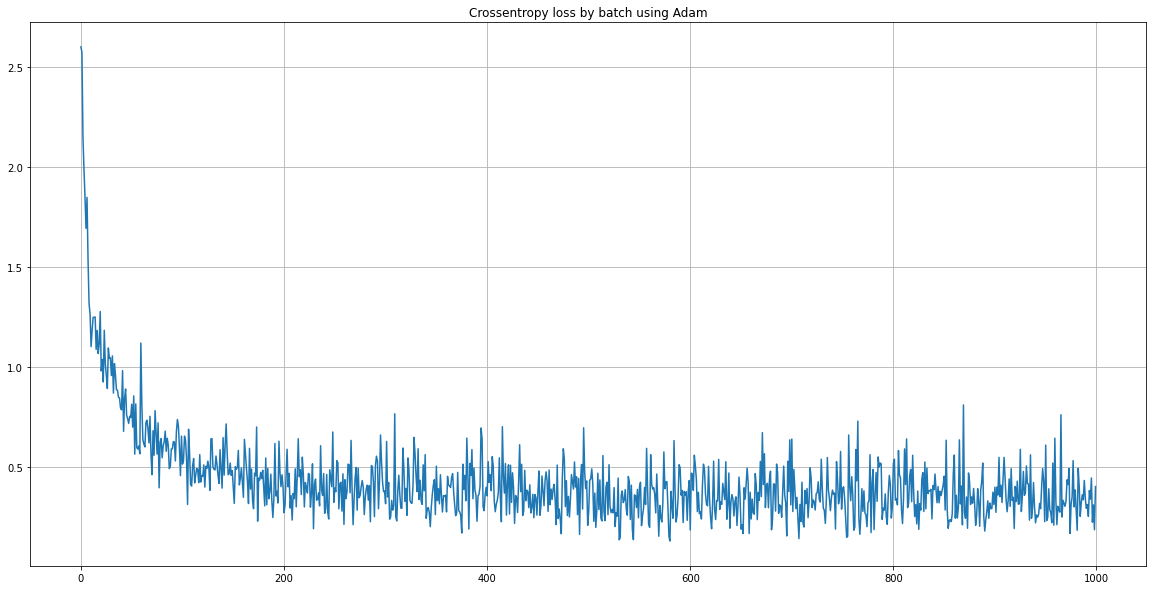

In [24]:
plt.figure(figsize=(20,10))
plt.title("Crossentropy loss by batch using Adam")
plt.grid()
plt.plot(history_adam.flatten())